In [1]:
from main import neural_net
import numpy as np
import pandas as pd

import math

In [2]:
data = pd.read_csv("mnist_train_small.csv")
trainPercentage = 0.75
testPercentage = 0.25

In [3]:
trainXy = data[:math.floor(len(data) * trainPercentage)]
testXy = data[math.floor(len(data) * trainPercentage):]
trainY = np.array(trainXy["6"])
del trainXy["6"]
trainX = np.array(trainXy)
testY = np.array(testXy["6"])
del testXy["6"]
testX = np.array(testXy)


In [4]:
#Normalize the data
trainX = trainX / 255.0
testX = testX / 255.0

In [5]:
model = neural_net([784, 128, 10])
# 784, 10, 10, 10
# 784, 32, 32, 10

In [6]:
tY = []
for i in range(0, len(trainY)):
    tY.append(np.reshape(np.eye(10)[:, trainY[i]], [-1, 1]))

In [7]:
tstY = []
for i in range(0, len(testY)):
    tstY.append(np.reshape(np.eye(10)[:, testY[i]], [-1, 1]))

In [8]:
tY[0]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [9]:
tX = []
for i in range(0, len(trainX)):
    tX.append(np.reshape(trainX[i], [-1, 1]))

In [10]:
tstX = []
for i in range(0, len(testX)):
    tstX.append(np.reshape(testX[i], [-1, 1]))

In [ ]:
costs = model.train(tX, tY, 150, 0.35) #15000 x 150, 0.01

[21.8515645984256, 7.26195811239115, 6.10335634127568, 5.1117372161325125, 4.4119090883811, 4.02811214610114, 3.819393649858868, 3.6616822614380853, 3.5202397890163932, 3.3915201292806763, 3.2741017448728575, 3.166732532363987, 3.068302809817816, 2.977834667286891, 2.894469165062933, 2.817452844077251, 2.7461247182448716, 2.679904361092692, 2.61828131398712, 2.560805827707612, 2.5070808457090785, 2.4567550967547604, 2.409517156060176, 2.365090340879698, 2.323228319778897, 2.2837113301400196, 2.246342913477112, 2.2109470918461183, 2.177365920623687, 2.1454573631496423, 2.1150934413082427, 2.0861586232655305, 2.0585484155106197, 2.0321681312737914, 2.006931811504686, 1.9827612780352475, 1.959585301453024, 1.937338868664446, 1.915962537214473, 1.8954018652082987, 1.875606907202021, 1.8565317677342001, 1.838134205288235, 1.8203752804382998, 1.8032190427586676, 1.786632251788606, 1.7705841279598944, 1.7550461299226943, 1.7399917551636235, 1.7253963612046714, 1.7112370050133945, 1.6974922985

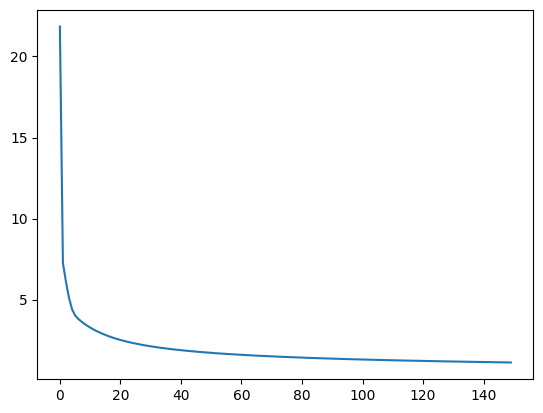

In [12]:
import matplotlib.pyplot as plt
plt.plot(costs)
print(costs)

In [20]:
#Evaluate Model
correct = 0
for i in range(0, len(tstX)):
    prediction = np.argmax(model.forward_prop(tstX[i])[-1][0])
    actual = np.argmax(tstY[i])
    if int(prediction) == int(actual):
        correct += 1

print("Accuracy: ", correct / len(tstX))
print(correct)
print(len(tstX))


Accuracy:  0.8194
4097
5000


In [29]:
#Evaluate Model
correct = 0
for i in range(0, len(tX)):
    prediction = np.argmax(model.forward_prop(tX[i])[-1][0])
    actual = np.argmax(tY[i])
    if int(prediction) == int(actual):
        correct += 1

print("Accuracy: ", correct / len(tX))
print(correct)
print(len(tX))

Accuracy:  0.8245216347756517
12367
14999


In [30]:
np.argmax(model.forward_prop(tstX[200])[-1][0])

5